<a href="https://colab.research.google.com/github/Haryohmi/Data-Science/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Machine Learning - Cluster using K-Means
The objective of K-means is simple: group similar data points together and discover underlying patterns.
#https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [4]:
#Import libraries

#Data Analysis libraries
import pandas as pd
import numpy as rp

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine leanring and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

#import warningswarnings.filterwarnings("ignore")

In [7]:
#Load data
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/10Alytics/Unsupervised Machine Learning/Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
#Check for missing values
print(data.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

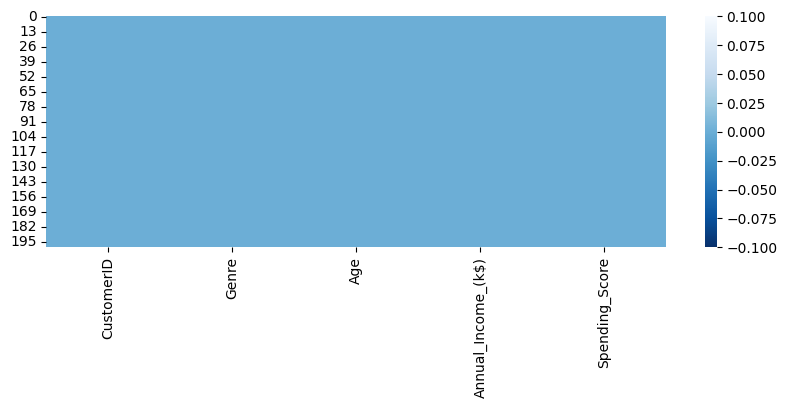

In [12]:
#Visualization of missing values
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

Data Cleaning and Preprocessing

In [13]:
#check for duplicates
print(data.duplicated().sum())

0


Drop unncessary column

In [26]:
data.drop("CustomerID", axis=1, inplace=True)
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


EDA
(Exploratory Data Analysis)

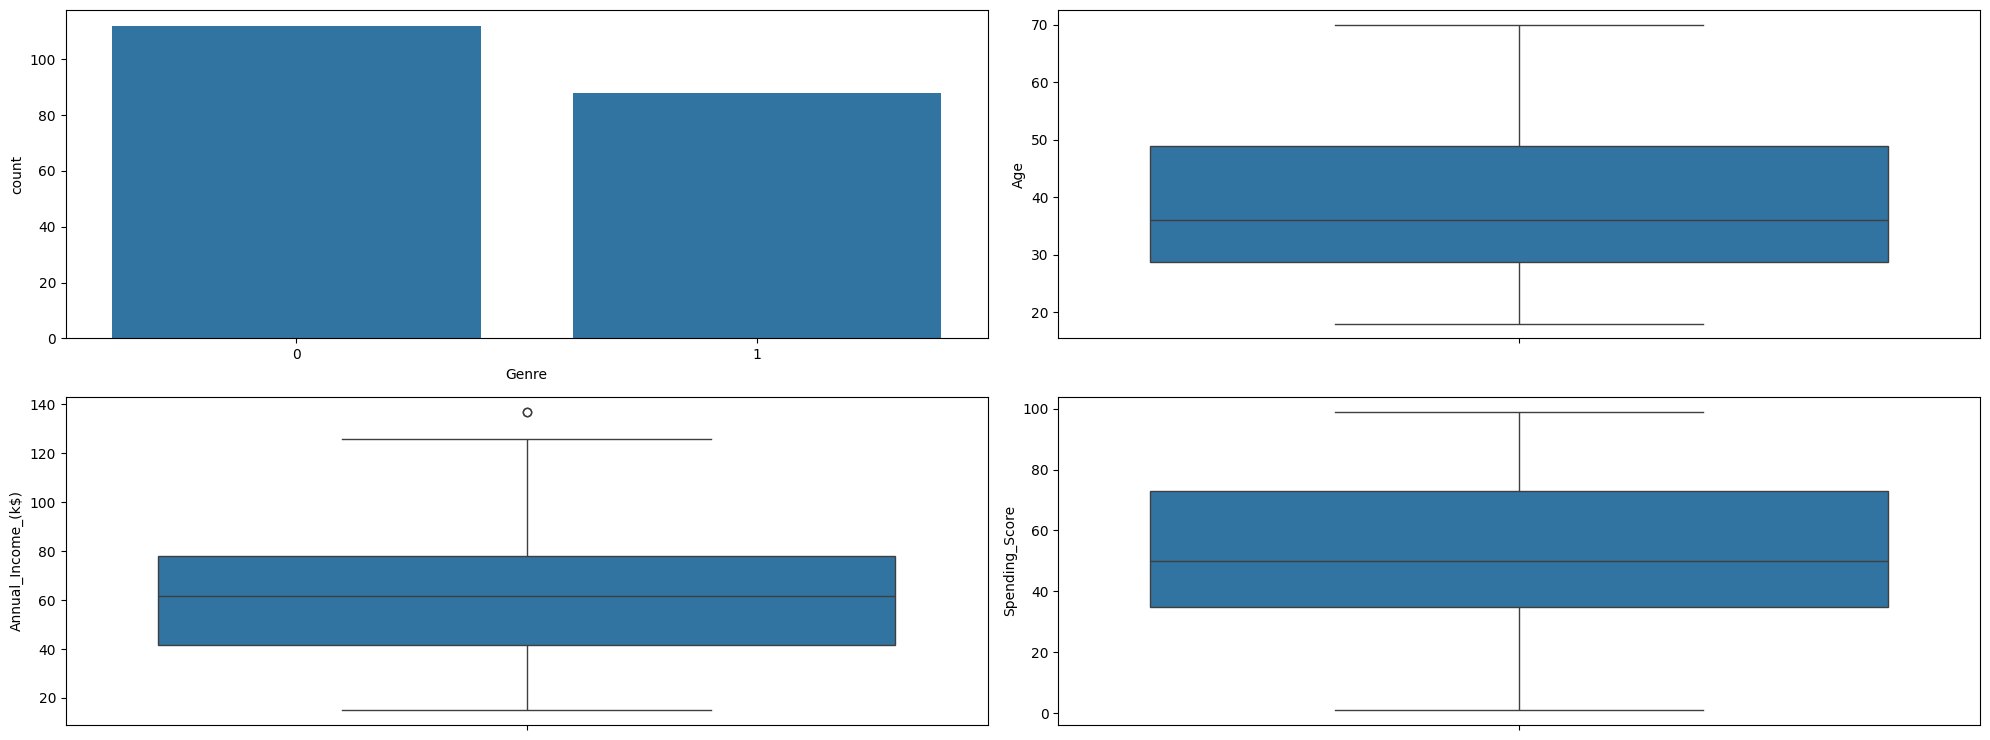

In [27]:
fig, axs = plt.subplots(2,2, figsize = (20,7.5))
plt1 = sns.countplot(x=data["Genre"], ax = axs[0,0])
plt2 = sns.boxplot(data["Age"], ax = axs[0,1])
plt3 = sns.boxplot(data["Annual_Income_(k$)"], ax = axs[1,0])
plt4 = sns.boxplot(data["Spending_Score"], ax = axs [1,1])

plt.tight_layout()

Narration

Categorical Data Encoding with LabelEncoder

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

#Loop through columns for categorical data (data.type = object)
for column in data.columns[1:]:
  if (data[column].dtype=="object"):
    data[column] = encoder.fit_transform(data[column])
  else:
    data[column] = data[column]

data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

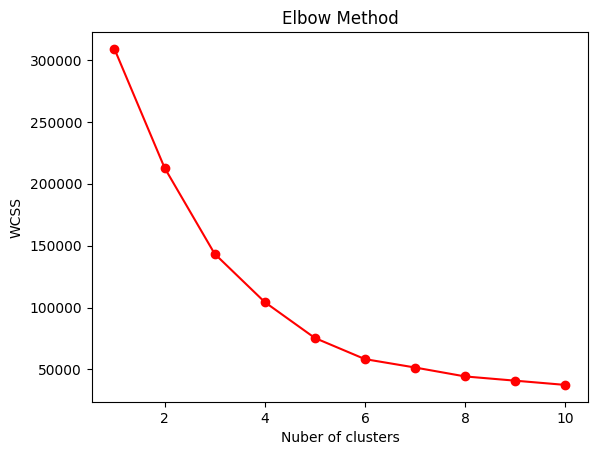

In [34]:
#Determine optimal number of cluster
WCSS = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
  kmeans.fit(data)
  WCSS.append(kmeans.inertia_)

plt.plot(range(1,11), WCSS, color="red", marker="o")
plt.title("Elbow Method")
plt.xlabel("Nuber of clusters")
plt.ylabel("WCSS")
plt.show()

In [35]:
# Fit K-means Clustering mdel
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
kmeans.fit(data)

#Add cluster labels to data
data["Cluster"] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


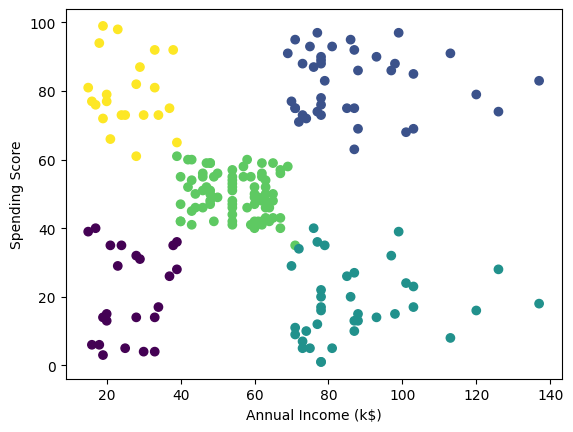

0.44493777835059417

In [42]:
#visualize cluster results
plt.scatter(data["Annual_Income_(k$)"], data["Spending_Score"], c=data["Cluster"], label="Centroids")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score")
plt.show()

#calculate the silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.labels_)

In Conclusion, the graphs shows 5 different categories of buyers

C1 = Low income earners (k$20 - k$40) spending low(0-40)
C2 = Low income earners (k$20 - k$40) spending high(60-100)
C3 = Average income earners (k$40 - k$70) spending low(40-60)
C4 = High income earners (k$70 - k$100) spending low(0-40)
C5 = High income earners (k$70 - k$100) spending High(60-100)